# Tutorial - Time Series Forecasting - Autoregressive Integrated Moving Average (ARIMA)

The goal is to forecast time series with the Autoregressive Integrated Moving Average (ARIMA) Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function ARIMA with Air Passengers, and 5) Function ARIMA with Wine Sales.

References Jason Brownlee - https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [13]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Autoregressive Autoregressive Integrated Moving Average (ARIMA) Approach with JetRail 

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

In [14]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Count, order=(3, 0, 1))
fit1 = model.fit(disp=False)
y_hat = test.copy()
y_hat['ARIMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

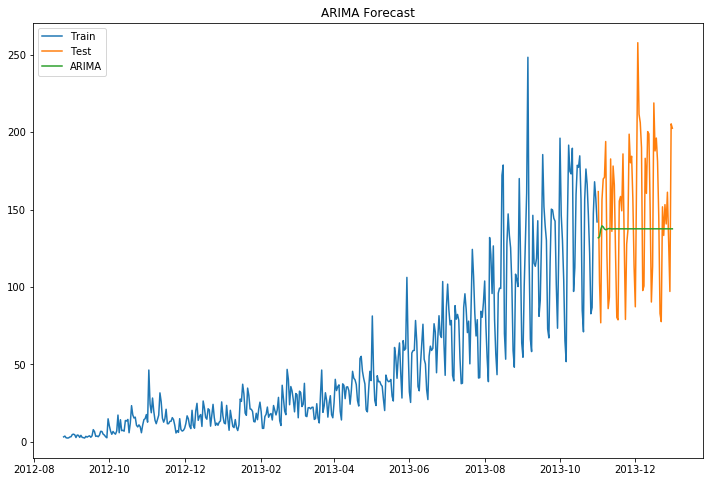

In [28]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.title("ARIMA Forecast")
plt.show()

# RMSE Calculation

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.ARIMA))
print('RMSE = '+str(rms))

RMSE = 44.855031024515405


# ARIMA Approach with Air Passagers 

In [30]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [31]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [33]:
# Create prediction table
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Passengers, order=(3, 0, 1))
fit1 = model.fit(disp=False)
y_hat = test.copy()
y_hat['ARIMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

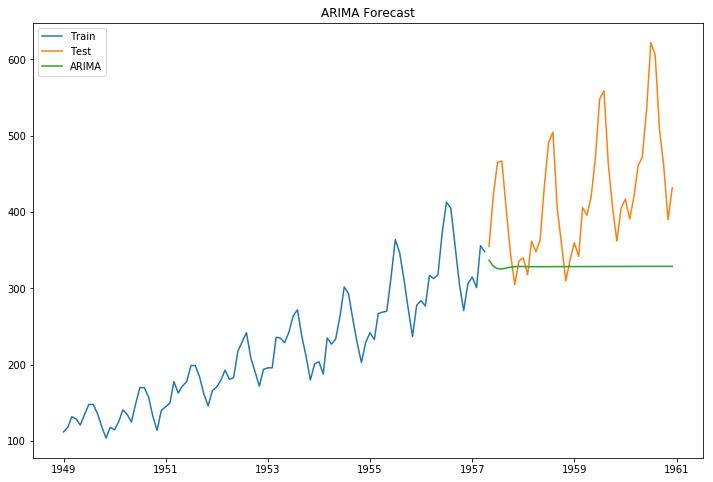

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.title("ARIMA Forecast")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.ARIMA))
print('RMSE = '+str(rms))

RMSE = 119.98629941824274


# Function ARIMA Approach with variables

In [39]:
def ARIMA_forecasting(mydf,colval,split, AR, I, MA):
    #print(split)
    import math
    from statsmodels.tsa.arima_model import ARIMA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = ARIMA(train[colval], order=(AR,I,MA))
    fit1 = model.fit(disp=False)
    y_hat = test.copy()
    y_hat['ARIMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['ARIMA'], label='ARIMA')
    plt.legend(loc='best')
    plt.title("ARIMA Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.ARIMA))
    print('RMSE = '+str(rms))

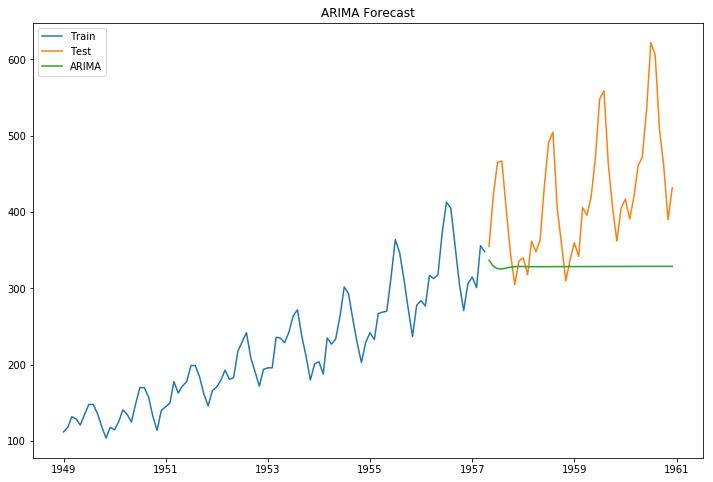

RMSE = 119.98629941824274


In [40]:
ARIMA_forecasting(df,'Passengers',0.7, 3,0,1)

# Testing Function Autoregression (AR) Approach with Wine Dataset 

In [41]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


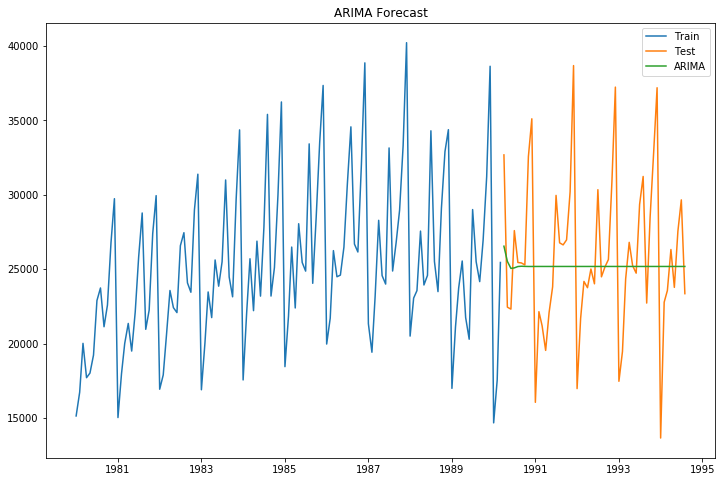

RMSE = 5207.6972660055135


In [43]:
ARIMA_forecasting(df,'Sales',0.7, 2,0,0)